## Research Question: 
What is the relationship between mental health and socioeconomic status?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('GSS.csv', low_memory=False)
print(df.shape)
df.head()


(72390, 23)


,year,id_,wrkstat,hrs2,wrkslf,industry,occ10,age,educ,happy,...,ballot,prestg10,sei10,hlthdep,hlthconf,hlthnot,feelnerv,worry,feeldown,nointerest
0,1972,1,Working full time,.i: Inapplicable,Someone else,Department and mail order establishments,"Wholesale and retail buyers, except farm products",23,16,Not too happy,...,.i: Inapplicable,45,50.0,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Retired,.i: Inapplicable,Someone else,Newspaper publishing and printing,First-line supervisors of production and opera...,70,10,Not too happy,...,.i: Inapplicable,50,46.5,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,Working part time,.i: Inapplicable,Someone else,"Real estate, incl. real estate-insurance-law o...",Real estate brokers and sales agents,48,12,Pretty happy,...,.i: Inapplicable,49,56.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Working full time,.i: Inapplicable,Someone else,Apparel and accessories,Accountants and auditors,27,17,Not too happy,...,.i: Inapplicable,60,76.3,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Keeping house,.i: Inapplicable,Someone else,Telephone (wire and radio),Telephone operators,61,12,Pretty happy,...,.i: Inapplicable,31,31.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [5]:
print("Column names:", df.columns.tolist())

Column names: ['year', 'id_', 'wrkstat', 'hrs2', 'wrkslf', 'industry', 'occ10', 'age', 'educ', 'happy', 'satjob', 'satfin', 'trauma5', 'ballot', 'prestg10', 'sei10', 'hlthdep', 'hlthconf', 'hlthnot', 'feelnerv', 'worry', 'feeldown', 'nointerest']


In [44]:
var = 'sei10'
# print(df[var].unique(),'\n')
df[var] = df[var].replace(-100., np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].unique(),'\n')

[50.  46.5 56.9 76.3 31.9 62.  36.2 32.  13.6 12.6 12.4 29.5 39.9 36.4
 41.1 82.5  nan 59.1 60.4 38.8 80.9 14.8 39.7 38.1 21.  28.4 27.7 84.2
 50.4 32.7 84.5 24.6 74.6 28.7 19.7 23.  31.1 42.8 20.8 25.  35.8 18.6
 14.  26.8 13.2 52.4 38.3 35.1 29.2 19.6 37.3 19.2 81.9 87.6 65.3 24.2
 39.1 69.3 43.  26.2 23.2 25.2 60.1 24.1 62.6 20.7 22.9 62.7 53.5 45.4
 48.8 48.1 31.  45.3 39.6 80.7 77.4 21.6 23.3 27.  71.6 72.7 76.7 75.5
 52.  43.8 37.6 58.4 15.8 27.2 21.8 73.9 68.  29.7  9.  92.1 50.3 34.1
 59.8 67.7 65.1 18.8 31.6 25.1 23.7 48.3 73.6 49.6 62.4 35.2 22.4 86.5
 57.1 17.5 37.7 24.  57.8 67.8 20.9 11.8 46.  34.7 27.5 53.8 23.8 41.
 21.4 41.8 46.6 26.1 31.2 32.6 28.6 35.3 58.1 65.2 12.7 26.5 52.1 81.6
 37.2 66.4 31.5 20.5 83.8 14.4 54.6 81.  14.6 89.9 47.9 38.2 22.1 49.4
 42.9 57.4 85.2 60.5 20.3 25.7 62.9 36.5 44.9 63.7 20.  28.3 10.6 77.2
 53.6 17.1 91.9 56.8 71.7 71.  91.1 64.9 61.4 27.1 26.6 29.9 70.3 69.4
 39.2 87.9 37.4 73.4 64.2 40.1 45.  89.3 30.3 19.  33.7 31.3 13.3 37.
 84.  61

<Axes: >

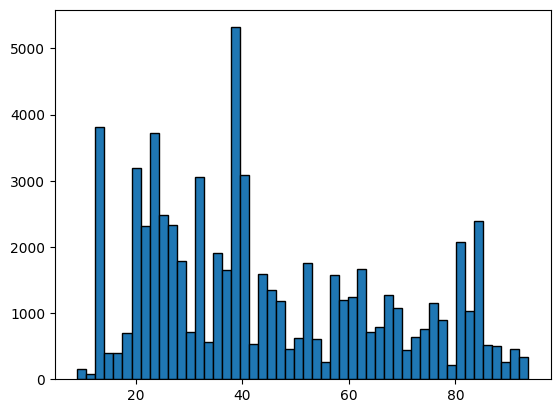

In [57]:
df['sei10'].hist(grid=False, edgecolor='Black', bins=50)

In [47]:
var = 'hlthdep'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

['.i:  Inapplicable' 'Often' 'Seldom' 'Never' 'Sometimes'
 '.s:  Skipped on Web' 'Very often' '.d:  Do not Know/Cannot Choose'
 '.n:  No answer'] 

[nan 'Often' 'Seldom' 'Never' 'Sometimes' 'Very often'] 



<Axes: >

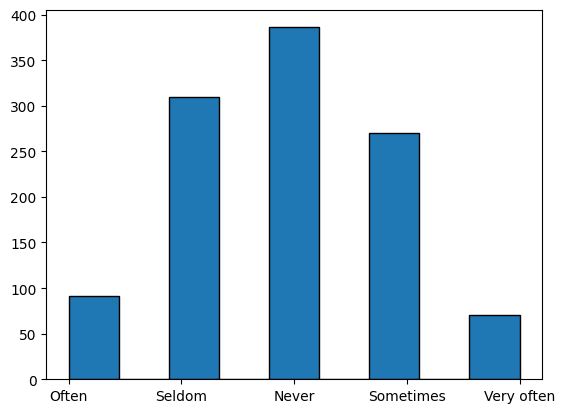

In [54]:
df['hlthdep'].hist(bins=9, grid=False, edgecolor='Black')

In [12]:
# cleaned happiness
var = 'happy'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

['Not too happy' 'Pretty happy' 'Very happy' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.i:  Inapplicable'
 '.s:  Skipped on Web'] 

['Not too happy' 'Pretty happy' 'Very happy' nan] 



<Axes: >

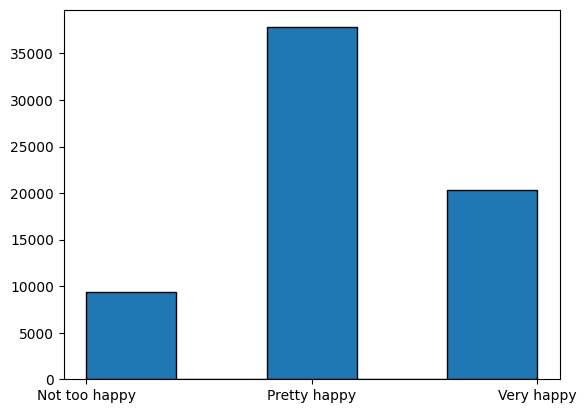

In [42]:
df['happy'].hist(bins=5, grid=False, edgecolor='Black')

In [13]:
# cleaned prestige associated with the respondent's occupation
var = 'prestg10'
print(df[var].unique(),'\n')
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].unique(),'\n')


['45' '50' '49' '60' '31' '43' '33' '25' '29' '51' '64'
 '.i:  Inapplicable' '53' '59' '35' '47' '61' '22' '39' '24' '38' '62'
 '32' '46' '74' '27' '36' '44' '28' '37' '30' '58' '71' '48' '66' '40'
 '42' '17' '65' '72' '55' '52' '56' '26' '41' '34' '67' '73' '21' '57'
 '69' '63' '70' '68' '16' '54' '20' '75' '18' '80' '23' '76'] 

[45. 50. 49. 60. 31. 43. 33. 25. 29. 51. 64. nan 53. 59. 35. 47. 61. 22.
 39. 24. 38. 62. 32. 46. 74. 27. 36. 44. 28. 37. 30. 58. 71. 48. 66. 40.
 42. 17. 65. 72. 55. 52. 56. 26. 41. 34. 67. 73. 21. 57. 69. 63. 70. 68.
 16. 54. 20. 75. 18. 80. 23. 76.] 



<Axes: >

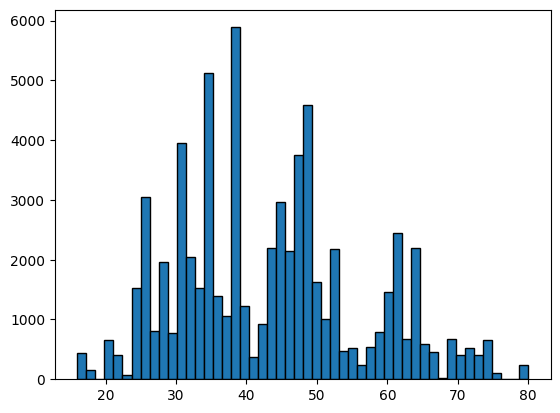

In [58]:
df['prestg10'].hist(grid=False, edgecolor='Black', bins=50)

[Text(0.5, 1.0, 'Socioeconomic Status vs Occupational Prestige'),
 Text(0.5, 0, 'Socioeconomic Index'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

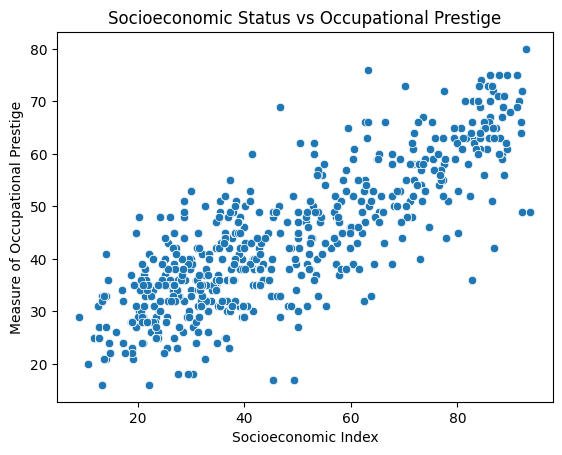

In [48]:
sns.scatterplot(x=df['sei10'],y=df['prestg10']).set(title="Socioeconomic Status vs Occupational Prestige",xlabel='Socioeconomic Index',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

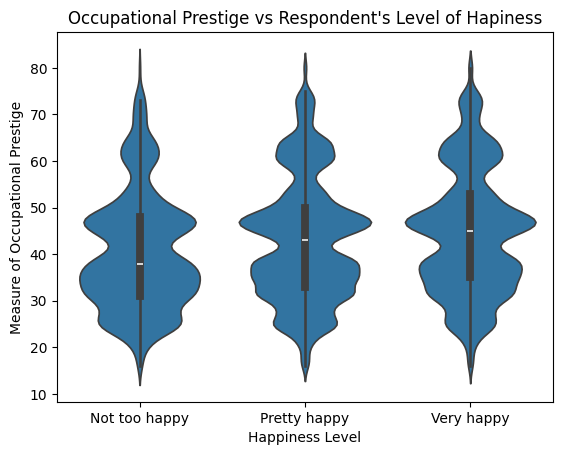

In [37]:
sns.violinplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

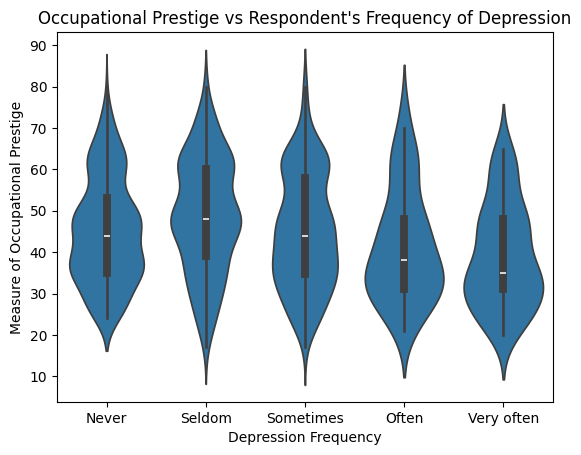

In [44]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

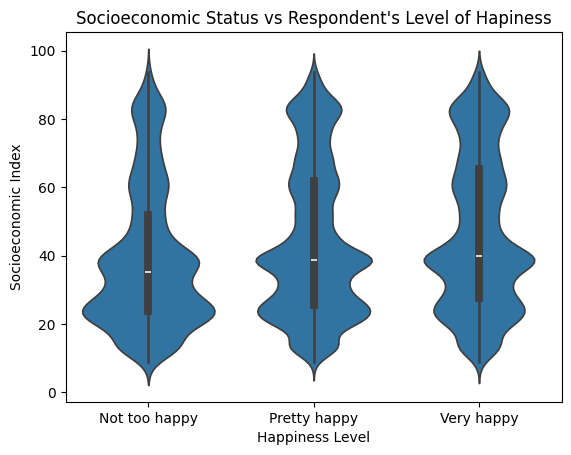

In [49]:
sns.violinplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

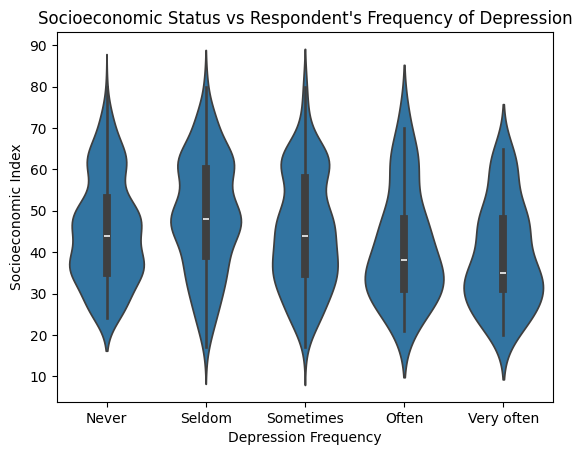

In [50]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

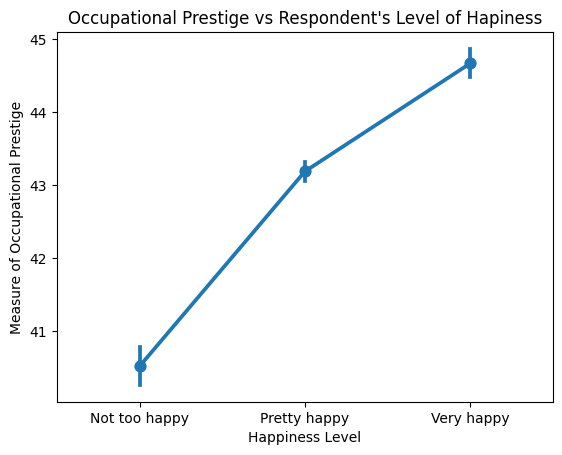

In [51]:
sns.pointplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

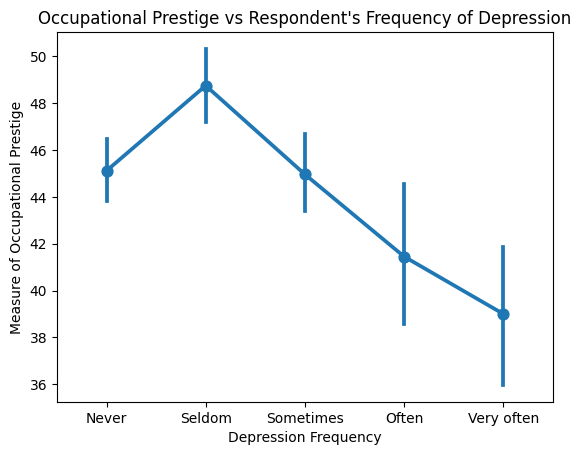

In [52]:
sns.pointplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

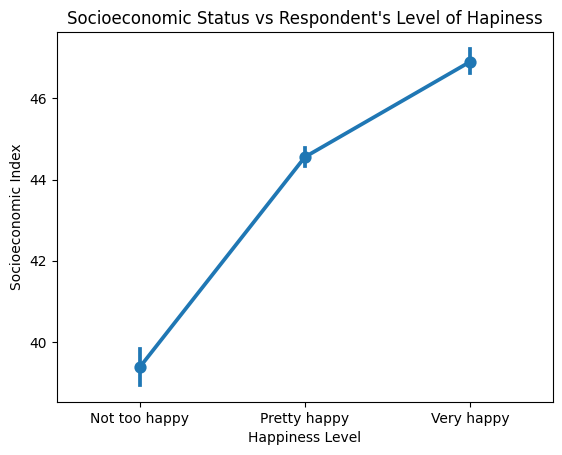

In [53]:
sns.pointplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

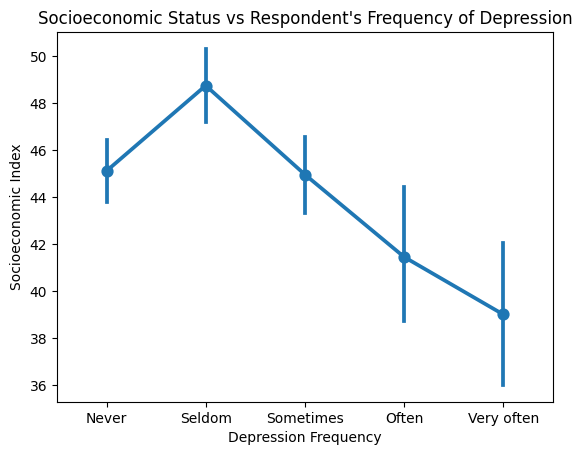

In [54]:
sns.pointplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

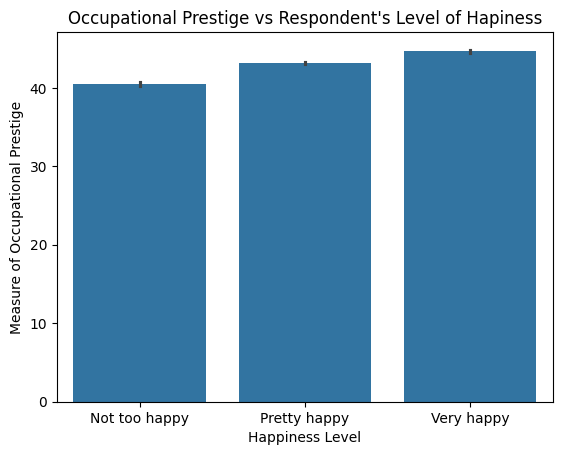

In [64]:
sns.barplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

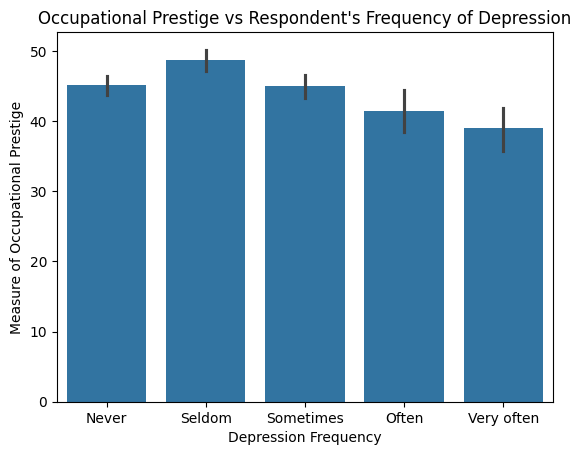

In [65]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

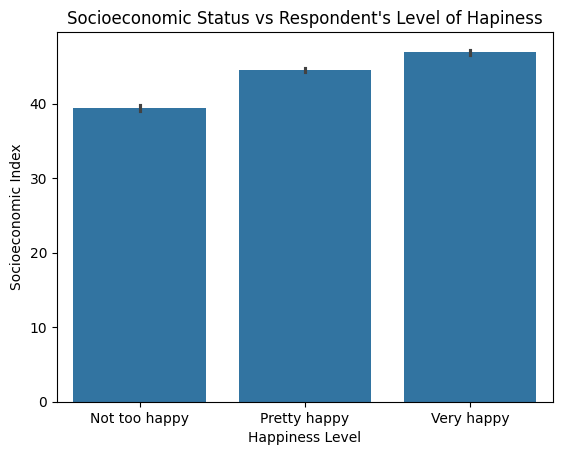

In [66]:
sns.barplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Status vs Respondent's Level of Hapiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

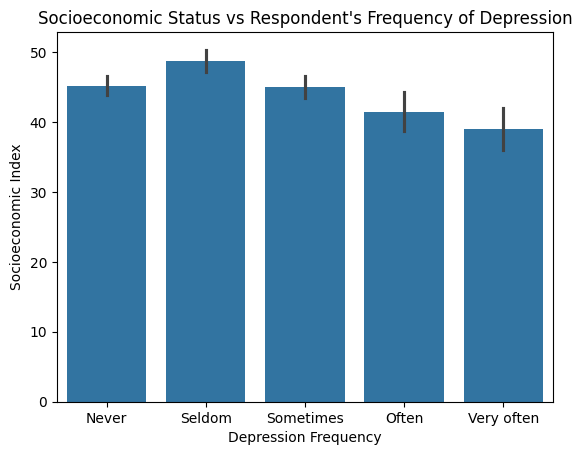

In [67]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Status vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')